### Background
<p>There have been claims in recent times about the rise in violent crimes in the UK and this has led to serious government intervention and the development of strategies to tackle violent crimes[4]. According to Walby et al [7] rate of violent crime has greatly increased since 2008 and the ITV documentary “Ross Kemp and the Armed Police” relayed on the 6th of September 2016 also made claims on the rising rate of violent crimes across the United Kingdom with specific mention of Birmingham as having more firearm incidents per head compared to other cities in the UK. The documentary also suggested that a strong relationship exists between crimes involving firearms and drug-related offenses. in the number of firearms in Birmingham, and the relationship between drug-related crimes and firearms.

<p>This report seeks to examine these claims with a view to determining their veracity and forecast future crime rates using relevant statistical tools and techniques on publicly available UK crime data generated from the website https://data.police.uk/


###  About the Data
<P>The crime data was collated from 43 geographic police forces across England and Wales, the Ministry of Justice, British Transport Police, and the Police Service of Northern Ireland and published by the Single Online Home National Data Team. It consists of records of individual crimes, anti-social behaviors, and police outcomes spawned monthly by the police force. To ensure privacy and data protection, sensitive details of the crime data such as location, and personal information are anonymized.  

### Aims and objectives
<P>The overall objective of this analysis is to establish, using applicable statistical tools and techniques such as Correlation, Regression, and Time series analyses.
<p>•   the type of relationships between the variables under consideration
<p>•   whether violent crime rates have been on the rise over the years as claimed by report
<p>•   whether firearms offenses are closely related to drug crimes and their degree of association
<p>•   if firearm incidence per head in greater in Birmingham in comparison to other parts of the UK
<p>•   forecast future crime levels across the UK.


### Technical approach
<p>To initialize the data pipeline, the crime data was downloaded from the above-mentioned website and imported in a csv.gz format to a Sparksession using Jupyter notebook. A Sparksession allows for the creation of dataframes, registering dataframe tables and querying of tables using SQL in Pyspark. 

#### Data Processing
<P>This entails the review and manipulation of data to make it fit for purpose, here each column and data type was reviewed using appropriate Pyspark functions. The crime data consist of 12 columns 65,078,250 rows collected between December 2010 to April 2013. The dataset was reviewed for missing values at different points of the analysis as the presence of missing data can distort the results of the analysis.  A value is said to be missing if it is relevant for a specific analysis but however not available[6] missing value or data are common in research are pose a huge challenge as they can lead to bias in the result of the analysis[3]. The identified missing values (NA) were dropped. 

#### Data Extraction
<P>This involves performing some filtering and extraction operations on the dataset in order to obtain subsets of the data that are relevant to the questions being reviewed. Data extraction allows for further data procession and transformation. The filtered and extracted dataset is transformed to a Pandas dataframe as this will enable the string date data type to be converted to datetime type and indexed for use in the time series analysis.

#### Time Series Analysis of UK Crime Data
<P>A time series analysis modelling approach was adopted to evaluate the claims about the crime rate in the UK. A time series is a set or collection of events, X(t), repeated over a time period[5], this approach involves plotting an observation or an event against time and deducing from the features of the plot, behaviours such as  trend, seasonality, outliers, sharp variations in behaviour or discontinuities in the plot[5][1].
The goal of adopting a time series approach is to enable confirm if violent crime rate is on the rise in the UK and make future prediction on crime. From the initial plot, it can be easily deduced that violent crime rate is on the decline in the UK. A scatter plot of the same data also shows that violent crime is on a gradual decline across the period under review with spikes in some months. 
<P>To better understand the plot and make predictions, by adopting statistical models to fit the data, there is however,  a need to make the series stationary. This is because the statistical models are stationary and are unable to work directly with time series which are non-stationary[1].

<P>Firstly, the time series plot is visually reviewed for sources of changes such as seasonal and cyclic variations, trends and other fluctuations[1].
Secondly, the plot is decomposed into its components, giving a plot of trend, seasonality and residual noise. From the decomposed plots it is obvious that the time series is not stationary, however, there is a need to statistically test for stationarity using rolling statistics and Augmented Dickey-Fuller test statistics.
    
##### Augmented Dickey-Fuller(ADF) Test
<P>To do this, the Augmented Dickey-Fuller Test is used to objectively confirm if differencing is needed to make the series stationary[2].
Thirdly, the trend and seasonality components of the series are eliminated by differencing, which is the introduction of a lag – 1 differencing operator ʎ to the time series equation[1],
                           <p>ʎXt = Xt – Xt-1 = (1- B) Xt
                           <p>where B is the backward shift operator
                           <p>BXt =Xt-1

<p> To achieve stationarity, the violent crime data was difference by a month shift, followed by a seasonal, 12months shift, and applying the ADF Test, stationarity was achieved at;
    
##### 1month Differencing
<p>ADF Test statistics:-3.1981746622141904
<p>p-value:0.02009058035657879
<p>No. of lags used:8
<p>No. of observation used:19
<p>Critical values:{'1%': -3.8326031418574136, '5%': -3.0312271701414204, '10%': -2.655519584487535}
    
##### Seasonal(12months) Differencing
<p>ADF Test statistics:-4.7824148444880406
<p>p-value:5.875891077739523e-05
<p>No. of lags used:6
<p>No. of observation used:10
<P>Critical values:{'1%': -4.331573, '5%': -3.23295, '10%': -2.7487}

<P>Upon achieving stationarity, autocorreletion analysis was carried out to determine the order of the Auto Regressive and Moving Average models, and the process integration (p,d,q) as these parameters are required for forcasting using the Seasonal Autoregressive Integrated Moving Average (SARIMA) model.

#### Seasonal Autoregressive Integrated Moving Average Model (SARIMA)
<p>The SARIMA model was introduced by Box and Jenkins in 1970 to manage the presence of seasonality in time series data. It is a modified version of the Autoregressive Integrated Moving Average (ARIMA) model which was built to handle stationary data. The SARIMA model applies differencing to the time series repeatedly until it appears to be stationary. The model is then used to train the data after splitting the series into train and test data[5]. Finally, forecasting was done beyond the given data end date of 2013, into 2015 to predict future violent crime rates in the United Kingdom. 



In [1]:
#The spark session is the initial point of entry to start programing with Dataframes and Datasets. 
#It is the first object to build when creating a sparkSQL application

from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("sample").getOrCreate()
spark

### Data Preprocessing

In [2]:
#The SparkFiles library is imported to allow us read the assessmemt data stored in a personal blob storage container
# To read the dataset into a spark dataframe with header=True and using the default datatypes

from pyspark import SparkFiles
url = "https://mykf7032blobstorage.blob.core.windows.net/kf7032-assessment-data/all_crimes21_hdr.txt.gz"
spark.sparkContext.addFile(url)
df_pyspark = spark.read.csv("file://"+SparkFiles.get("all_crimes21_hdr.txt.gz"), header=True, inferSchema= True)

In [3]:
# To display the dataframe

df_pyspark.show()

+--------+-------+--------------------+--------------------+---------+---------+--------------------+---------+--------------------+--------------------+---------------------+-------+
|Crime ID|  Month|         Reported by|        Falls within|Longitude| Latitude|            Location|LSOA code|           LSOA name|          Crime type|Last outcome category|Context|
+--------+-------+--------------------+--------------------+---------+---------+--------------------+---------+--------------------+--------------------+---------------------+-------+
|    null|2010-12|Avon and Somerset...|Avon and Somerset...|  -0.8056|51.819143|On or near Norfol...|E01017662| Aylesbury Vale 015C|         Other crime|                 null|   null|
|    null|2010-12|Avon and Somerset...|Avon and Somerset...|-2.494366|51.418169|On or near Keynsh...|E01014399|Bath and North Ea...|Anti-social behav...|                 null|   null|
|    null|2010-12|Avon and Somerset...|Avon and Somerset...|-2.511927|51.409435|

In [4]:
# The column header, Last outcome category is too long, and better to make it shorter, renaming it as "outcome"

df = df_pyspark.withColumnRenamed('Last outcome category', 'Outcome')

In [5]:
# To display the column datatypes as inferred by spark, we use the printSchema function

df.printSchema()

root
 |-- Crime ID: string (nullable = true)
 |-- Month: string (nullable = true)
 |-- Reported by: string (nullable = true)
 |-- Falls within: string (nullable = true)
 |-- Longitude: double (nullable = true)
 |-- Latitude: double (nullable = true)
 |-- Location: string (nullable = true)
 |-- LSOA code: string (nullable = true)
 |-- LSOA name: string (nullable = true)
 |-- Crime type: string (nullable = true)
 |-- Outcome: string (nullable = true)
 |-- Context: string (nullable = true)



In [6]:
# To confirm the dataframe type

type(df)

pyspark.sql.dataframe.DataFrame

In [7]:
# To confirm and display the columns in the dataset
df.columns

['Crime ID',
 'Month',
 'Reported by',
 'Falls within',
 'Longitude',
 'Latitude',
 'Location',
 'LSOA code',
 'LSOA name',
 'Crime type',
 'Outcome',
 'Context']

In [8]:
# Reveiwing our data to understand what the data is about, we display the headers and first 3 rows and confirm the row count

df.head(3)

[Row(Crime ID=None, Month='2010-12', Reported by='Avon and Somerset Constabulary', Falls within='Avon and Somerset Constabulary', Longitude=-0.8056, Latitude=51.819143, Location='On or near Norfolk Terrace', LSOA code='E01017662', LSOA name='Aylesbury Vale 015C', Crime type='Other crime', Outcome=None, Context=None),
 Row(Crime ID=None, Month='2010-12', Reported by='Avon and Somerset Constabulary', Falls within='Avon and Somerset Constabulary', Longitude=-2.494366, Latitude=51.418169, Location='On or near Keynsham Road', LSOA code='E01014399', LSOA name='Bath and North East Somerset 001A', Crime type='Anti-social behaviour', Outcome=None, Context=None),
 Row(Crime ID=None, Month='2010-12', Reported by='Avon and Somerset Constabulary', Falls within='Avon and Somerset Constabulary', Longitude=-2.511927, Latitude=51.409435, Location='On or near Harlech Close', LSOA code='E01014399', LSOA name='Bath and North East Somerset 001A', Crime type='Anti-social behaviour', Outcome=None, Context=No

In [9]:
# To confirm the number of rows in the dataset

df.count()

65078250

In [10]:
# Here we try to deal with missing values, to do, we take into account the columns of interest, and delete rows with missing values for these headers 
# Columns, Month, Location,LSOA code, LSOA name, Crime type and Outcome should not have missing values

df1 = df.na.drop('any', subset = ['Month', 'Location', 'LSOA code', 'LSOA name', 'Crime type', 'Outcome'])
df1.show()
df1.count()

+--------------------+-------+--------------------+--------------------+---------+---------+--------------------+---------+--------------------+--------------------+--------------------+-------+
|            Crime ID|  Month|         Reported by|        Falls within|Longitude| Latitude|            Location|LSOA code|           LSOA name|          Crime type|             Outcome|Context|
+--------------------+-------+--------------------+--------------------+---------+---------+--------------------+---------+--------------------+--------------------+--------------------+-------+
|b1a34824199f9d587...|2012-01|Avon and Somerset...|Avon and Somerset...| -2.49487|51.422276|On or near Confer...|E01014399|Bath and North Ea...|         Other theft|Offender given co...|   null|
|47467c9dc2f352576...|2012-01|Avon and Somerset...|Avon and Somerset...|-2.501425|51.416692|On or near Parkin...|E01014400|Bath and North Ea...|         Shoplifting|Offender sent to ...|   null|
|b563e0b1f7fdc6853...|201

37800178

### Data Extraction and Filtering

##### To determine whether Violent Crimes are increasing, decreasing, or are stable

In [11]:
# To filter the dataset so that only relevant crimes are included, here we need to confirming if violet crimes are increasing, we filter for violet crime

from pyspark.sql.functions import col
violent_crime_df = df.filter(col("Crime type") == "Violent crime")

In [12]:
# To display the table

violent_crime_df.show(truncate=False) 

+--------+-------+------------------------------+------------------------------+---------+---------+---------------------------------+---------+---------------------------------+-------------+-------+-------+
|Crime ID|Month  |Reported by                   |Falls within                  |Longitude|Latitude |Location                         |LSOA code|LSOA name                        |Crime type   |Outcome|Context|
+--------+-------+------------------------------+------------------------------+---------+---------+---------------------------------+---------+---------------------------------+-------------+-------+-------+
|null    |2010-12|Avon and Somerset Constabulary|Avon and Somerset Constabulary|-2.509773|51.405767|On or near Cedar Drive           |E01014402|Bath and North East Somerset 002A|Violent crime|null   |null   |
|null    |2010-12|Avon and Somerset Constabulary|Avon and Somerset Constabulary|-2.497371|51.412906|On or near Temple Street         |E01014403|Bath and North East 

In [13]:
violent_crime_df.count()

1673219

In [14]:
# First import all the relevant libraries required for the analysis
 
%matplotlib inline    
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings("ignore") # specify to ignore warning messages
import itertools

import seaborn as sns; sns.set_theme()
import matplotlib.pyplot as plt

from pyspark import SparkFiles
from pyspark.sql.types import *
from pyspark.sql.functions import count, avg, sum, col, to_date

import statsmodels.api as sm

In [15]:
# To extract Violent crime as a time series,grouping violent crime type by month in order to evaluate the trend

violent_crime = violent_crime_df.select("Month")\
    .where((col('Crime type') ==  'Violent crime'))\
    .groupBy("Month")\
    .count()\
    .orderBy("Month", ascending=True)

In [16]:
violent_crime.show()

+-------+-----+
|  Month|count|
+-------+-----+
|2010-12|57580|
|2011-01|59823|
|2011-02|56691|
|2011-03|62326|
|2011-04|64299|
|2011-05|63633|
|2011-06|62475|
|2011-07|66572|
|2011-08|63284|
|2011-09|57150|
|2011-10|60076|
|2011-11|56895|
|2011-12|56163|
|2012-01|56324|
|2012-02|50598|
|2012-03|58606|
|2012-04|53415|
|2012-05|59541|
|2012-06|56816|
|2012-07|60199|
+-------+-----+
only showing top 20 rows



In [17]:
# Renaming the count column to reflect what is being counted 
violent_crime1 = violent_crime.withColumnRenamed('count','Violent_crime')

In [18]:
df2 = violent_crime1
df2.show()



+-------+-------------+
|  Month|Violent_crime|
+-------+-------------+
|2010-12|        57580|
|2011-01|        59823|
|2011-02|        56691|
|2011-03|        62326|
|2011-04|        64299|
|2011-05|        63633|
|2011-06|        62475|
|2011-07|        66572|
|2011-08|        63284|
|2011-09|        57150|
|2011-10|        60076|
|2011-11|        56895|
|2011-12|        56163|
|2012-01|        56324|
|2012-02|        50598|
|2012-03|        58606|
|2012-04|        53415|
|2012-05|        59541|
|2012-06|        56816|
|2012-07|        60199|
+-------+-------------+
only showing top 20 rows



In [19]:
## Convert the Pyspark dataframe to a pandas dataframe in order to change the time type and index it.

pdf2 = df2.toPandas()

In [20]:
pdf2['Month'] = pd.to_datetime(pdf2['Month'], infer_datetime_format = True)
index_pdf2 = pdf2.set_index(['Month'])
index_pdf2.head()

,Violent_crime
Month,
2010-12-01,57580
2011-01-01,59823
2011-02-01,56691
2011-03-01,62326
2011-04-01,64299


In [21]:
index_pdf2.tail()

,Violent_crime
Month,
2012-12-01,55572
2013-01-01,53872
2013-02-01,47842
2013-03-01,54439
2013-04-01,53367


In [22]:
##### Visualizing the relationship using time series plot. Futher visualization is provided upon decompostion to give  the different component of the series and finally a scatter plot is also used to visualize the data relationship

<AxesSubplot:xlabel='Month'>

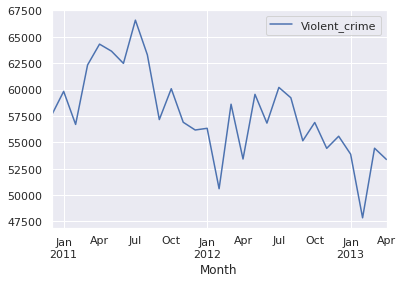

In [23]:
## creating a time series plot
index_pdf2.plot()

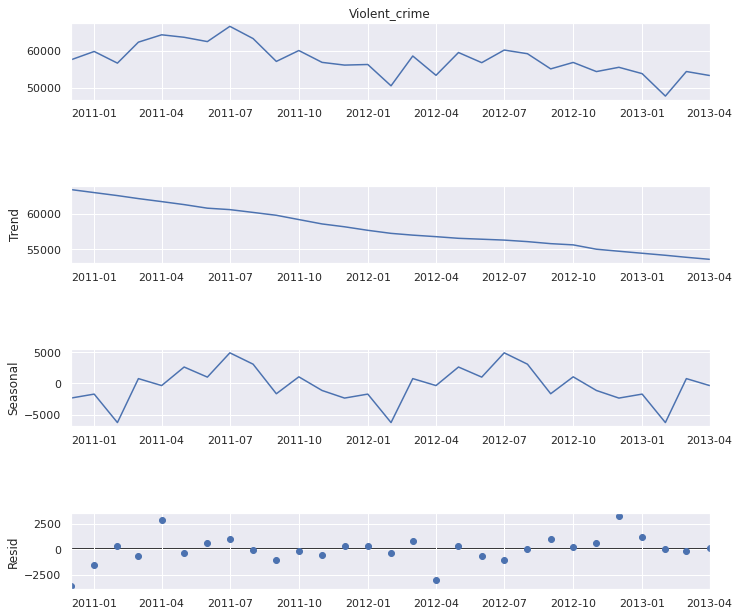

In [24]:
# To separate the timeseries into its constituent components
decomposition = sm.tsa.seasonal_decompose(index_pdf2['Violent_crime'], model='additive',extrapolate_trend='freq')
fig = decomposition.plot()
fig.set_size_inches(12,10)
plt.show()


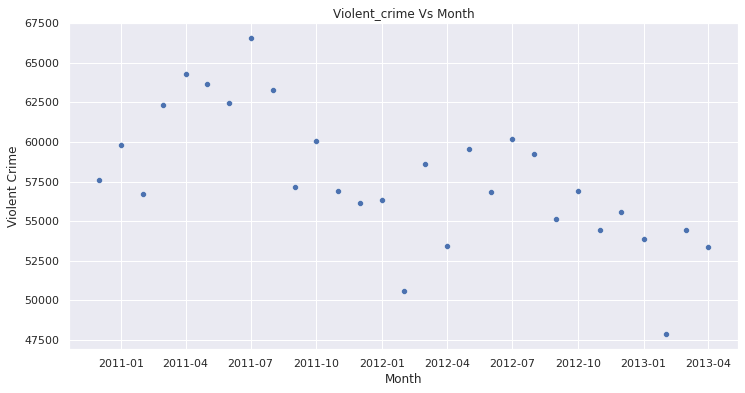

In [25]:
#scatter plot to review the behavior of the data, and relationship between violent crime and month
plt.figure(figsize=(12,6))
sns.scatterplot(data = index_pdf2, x='Month', y='Violent_crime')
plt.title('Violent_crime Vs Month') #title
plt.xlabel('Month') #x label
plt.ylabel('Violent Crime') #y label
plt.show()

<p> A time series consists of systematic and non-systematic components. The systematic components comprise components that are repetitive or consistent over time. They can be modelled and forecasted while the non-systematic components are not consistent and cannot be modelled directly.

 
<p> • Multiple visualizations are used to determine the behaviour and the components of the series. 
<p> • Multiple visualizations also tell us if the components of the series can be modelled and forecasted. 
<p> • It also advises on which model to adopt, additive or multiplicative model.


<p> To achieve this, the time series is decomposed into its noise, trend, seasonality, and level components. 
Visual analysis of the trend component shows that the violent crime rate has decreased considerably from 2011 to 2013.
It also shows a linear negative (downward) relationship between violent crime rate and time, the linear relationship suggests that an addictive model should be adopted in forecasting future violent crime rates. 

### Test for Stationarity using Rolling Statistics and Augmented Dickey-Fuller test

<p>A time series is stationary if the variance, covariance, and mean are constant over time otherwise it is non-stationary [16]. Visually, the time the crime data time series is not stationary, hence the need to test using the ADF test. The time series must be made stationary to build a forecasting model that will give an optimum prediction.

##### Augmented Dickey-Fuller test
<p>This is a statistical significance test technique that tests if the null hypothesis should be rejected, and the alternate hypothesis accepted given the p-value. The ADF uses the unit-root test to test for stationarity. The existence of a unit in a time series signifies a null hypothesis, while the alternative hypothesis means the time series is stationary[15].

In [26]:
# to test for statinarity using rolling statistics, taking a rolling window of 12months
rolmean = index_pdf2.rolling(window = 12).mean()

rolstd = index_pdf2.rolling(window = 12).std()
print(rolmean)


            Violent_crime
Month                    
2010-12-01            NaN
2011-01-01            NaN
2011-02-01            NaN
2011-03-01            NaN
2011-04-01            NaN
2011-05-01            NaN
2011-06-01            NaN
2011-07-01            NaN
2011-08-01            NaN
2011-09-01            NaN
2011-10-01            NaN
2011-11-01   60900.333333
2011-12-01   60782.250000
2012-01-01   60490.666667
2012-02-01   59982.916667
2012-03-01   59672.916667
2012-04-01   58765.916667
2012-05-01   58424.916667
2012-06-01   57953.333333
2012-07-01   57422.250000
2012-08-01   57083.333333
2012-09-01   56916.166667
2012-10-01   56649.500000
2012-11-01   56443.583333
2012-12-01   56394.333333
2013-01-01   56190.000000
2013-02-01   55960.333333
2013-03-01   55613.083333
2013-04-01   55609.083333


In [27]:
print(rolstd)

            Violent_crime
Month                    
2010-12-01            NaN
2011-01-01            NaN
2011-02-01            NaN
2011-03-01            NaN
2011-04-01            NaN
2011-05-01            NaN
2011-06-01            NaN
2011-07-01            NaN
2011-08-01            NaN
2011-09-01            NaN
2011-10-01            NaN
2011-11-01    3331.272493
2011-12-01    3481.399017
2012-01-01    3708.186431
2012-02-01    4588.431886
2012-03-01    4541.159633
2012-04-01    4619.450232
2012-05-01    4371.908330
2012-06-01    4197.035260
2012-07-01    3318.586285
2012-08-01    2838.466370
2012-09-01    2892.734436
2012-10-01    2717.130355
2012-11-01    2789.501926
2012-12-01    2800.103158
2013-01-01    2893.606557
2013-02-01    3436.280053
2013-03-01    3354.185159
2013-04-01    3357.072140


In [28]:
# To test for stationarity, first confirm if the mean and standard deviation are constant overtime. 
# This is done by determing the rolling statistics and displaying it in the plot below

def test_stationarity(timeseries, title):
    plt.clf()
  
    rolmean = pd.Series(timeseries).rolling(window=12).mean() 
    rolstd = pd.Series(timeseries).rolling(window=12).std()
    
    fig, ax = plt.subplots(figsize=(16, 4))
    ax.plot(timeseries, label= title)
    ax.plot(rolmean, label='rolling mean');
    ax.plot(rolstd, label='rolling std (x10)');
    ax.legend()
    plt.show()

<Figure size 432x288 with 0 Axes>

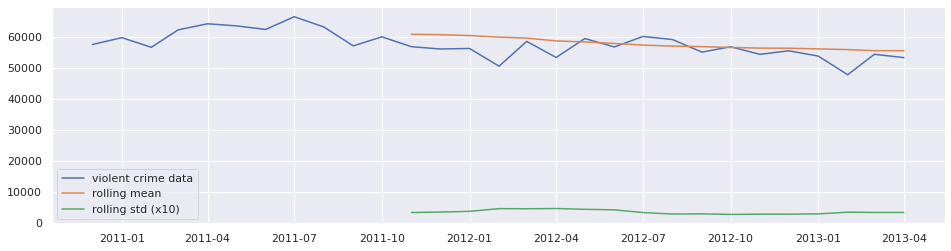

In [29]:
#To display a plot of the rolling statistics along side the time series

test_stationarity(index_pdf2['Violent_crime'],'violent crime data')

<p> The rolling statistics plots show that mean, standard deviation and covariance are now relatively constant over time, an indication that the data is now stationary, however there is still a seasonal behavior in the data. The rolling statistics only uses visual analysis to check for stationarity, we test further using the ADF test.

In [30]:
# To apply the Augmented Dickey-Fuller test for confirming stationarity, the statsmodels library is used.

from statsmodels.tsa.stattools import adfuller


In [31]:
test_result = adfuller(index_pdf2['Violent_crime'])

In [32]:
# to define the hypothesis

# Null Hypothesis(Ho): time series is Not stationary
# Alternate Hypothesis(H1): times series is stationary

def adfuller_test(Violent_crime):
    result = adfuller(Violent_crime)
    labels = ['ADF Test statistics', 'p-value', 'No. of lags used','No. of observation used','Critical values']
    for value, label in zip(result, labels):
        print(label+':'+str(value) )
    if result[1] <= 0.05:
        print("Reject Null hypothesis because time series is stationary and does not have a unit root")
    else:
        print("Accept Null hypothesis because time series is not stationary and has a unit root")
    
        


In [33]:
adfuller_test(index_pdf2['Violent_crime'])

ADF Test statistics:-1.2820436626574527
p-value:0.6373468005220095
No. of lags used:1
No. of observation used:27
Critical values:{'1%': -3.6996079738860943, '5%': -2.9764303469999494, '10%': -2.627601001371742}
Accept Null hypothesis because time series is not stationary and has a unit root


In [34]:
# The result from the ADF test shows that the timeseries is not stationary at p-value = 0.6373;
# differencing with shift=1month and seasonal shift (shift = 12) as time series has a seasonal component and displaying the new dataset

index_pdf2['first difference'] = index_pdf2['Violent_crime'] - index_pdf2['Violent_crime'].shift(1)


index_pdf2['seasonal difference'] = index_pdf2['Violent_crime'] - index_pdf2['Violent_crime'].shift(12)

index_pdf2.head(20)

,Violent_crime,first difference,seasonal difference
Month,,,
2010-12-01,57580,NaN,NaN
2011-01-01,59823,2243.0,NaN
2011-02-01,56691,-3132.0,NaN
2011-03-01,62326,5635.0,NaN
2011-04-01,64299,1973.0,NaN
2011-05-01,63633,-666.0,NaN
2011-06-01,62475,-1158.0,NaN
2011-07-01,66572,4097.0,NaN
2011-08-01,63284,-3288.0,NaN


<Figure size 432x288 with 0 Axes>

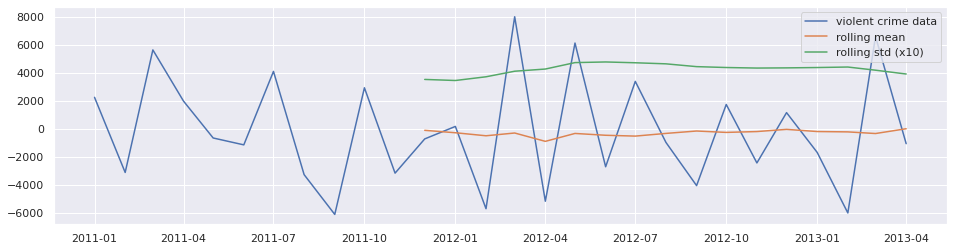

ADF Test statistics:-3.1981746622141882
p-value:0.020090580356578912
No. of lags used:8
No. of observation used:19
Critical values:{'1%': -3.8326031418574136, '5%': -3.0312271701414204, '10%': -2.655519584487535}
Reject Null hypothesis because time series is stationary and does not have a unit root


In [35]:
# testing stationarity again using the shift(1) and seasonal shift in violent crime data

test_stationarity(index_pdf2['first difference'],'violent crime data')
adfuller_test(index_pdf2['first difference'].dropna())


<Figure size 432x288 with 0 Axes>

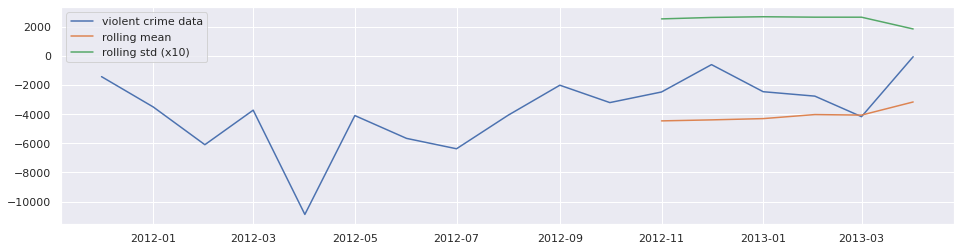

ADF Test statistics:-4.782414844488048
p-value:5.8758910777393576e-05
No. of lags used:6
No. of observation used:10
Critical values:{'1%': -4.331573, '5%': -3.23295, '10%': -2.7487}
Reject Null hypothesis because time series is stationary and does not have a unit root


In [36]:
test_stationarity(index_pdf2['seasonal difference'],'violent crime data')
adfuller_test(index_pdf2['seasonal difference'].dropna())

The plots above show the differenced data, first, with a one month shift and secondly, with a seasonal shift. Stationarity is achieved in both cases. However, the second plot show less seasonality and will be adopted for modelling.

#### Autocorrelation analysis

<p> Autocorrelation analysis is a correlation analysis between a time series and a lagged version of the same time series. It is deployed when adopting the ARIMA model for forecasting. It is used to determine the parameters of the Auto Regression (AR) and Moving Average (MA) models. The analysis involves visually identifying through plots, the order of the AR model using the Partial Autocorrelation Function (PACF) and the order of the MA model using the Autocorrelation Function (ACF).
The following parameters are defined as[8][9].

<p>p:  AR model lags
<p>d: Process integration order
<p>q: MA model lags
<p>The above will be determined from the acf/pacf plots using the statsmodel time series library.


In [37]:
# to identify the ACF and PACF for the AR and MA models
import warnings
import itertools

import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

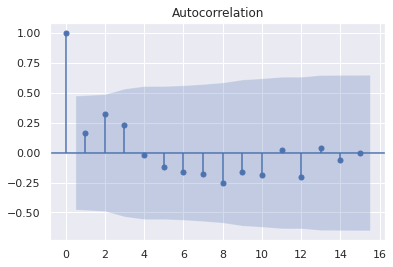

In [38]:

fig = sm.graphics.tsa.plot_acf(index_pdf2['seasonal difference'].dropna(), lags = 15)


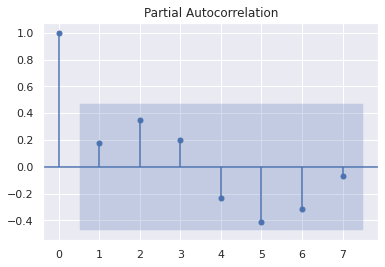

In [39]:


fig = sm.graphics.tsa.plot_pacf(index_pdf2['seasonal difference'].dropna(), lags = 7)

#### Model Implementation and Result

The Seasonal ARIMA model was implemented for forecasting time series has been established to possess the following advantages over other models.
<p>• It is simple, easy to interpret, and can be used for predicting seasonal time series 
<p>• It can be adapted for stationary seasonal time series with no missing values[10]
<p>• It can be adopted for forecasting long and short-term trends in data with high levels of accuracy[11] 
<p>• It allows for the presence or addition of exogenous explanatory variables[12]
<p>• It can adequately interpret time series with non-stationary behaviours within and across seasons

It was however discovered during the modelling that SARIMA has the following limitations
<p>• It only assumes a linear relationship within the time series data[10]
<P>• With seasonal data, the model requires a considerable amount of data (above 3 years) for evaluation (training and testing) to make a good forecast.



In [40]:
## To define statistical Seasonal ARIMA (SARIMA) model with p,q,d obtained from the autocorrelation analysis above

model = sm.tsa.statespace.SARIMAX(index_pdf2['Violent_crime'], order = (1,1,1), seasonal_order = (1,1,1,12))
model_result = model.fit()

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [41]:
print(model_result.summary())

                                     SARIMAX Results                                      
Dep. Variable:                      Violent_crime   No. Observations:                   29
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -148.303
Date:                            Thu, 22 Dec 2022   AIC                            306.606
Time:                                    19:40:06   BIC                            310.469
Sample:                                12-01-2010   HQIC                           306.803
                                     - 04-01-2013                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8742      0.199     -4.388      0.000      -1.265      -0.484
ma.L1          0.7992      0.205   

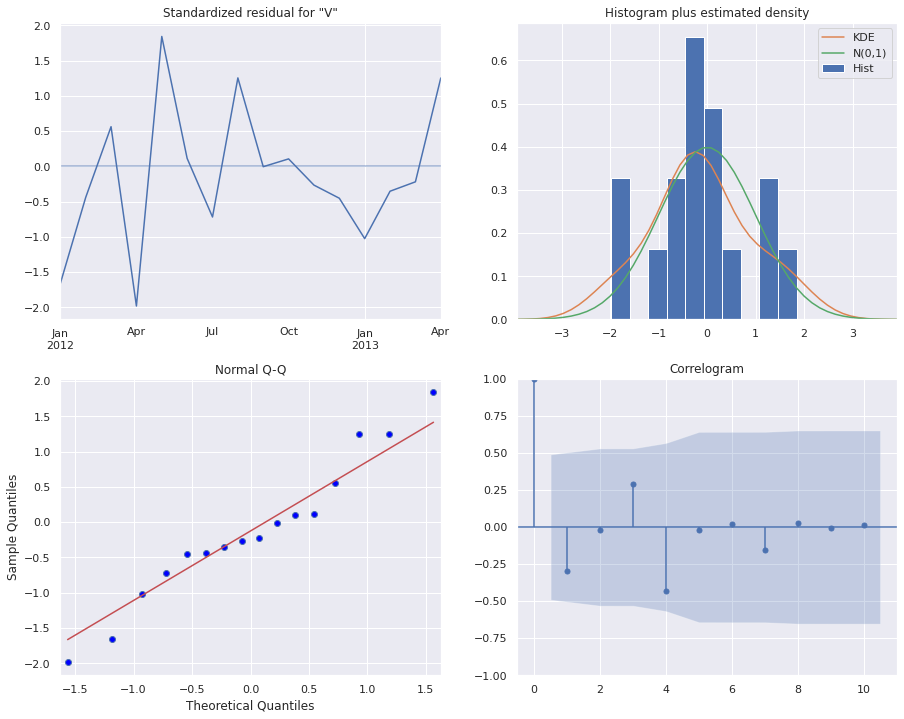

In [42]:

model_result.plot_diagnostics(figsize=(15, 12))
plt.show()

#### Model Result

<p>The model diagnostic gives four distinct plots (Standardized residual plot, Q-Q plot, Histogram, estimated density plot, and correlation plot). The model diagnostic assesses the residual training data to confirm how linear and normally distributed the residual data is. The residual of the training data represents the difference between the one-step-ahead prediction and the raw time series data[9].

<p>The standard residual plot shows the model performance is in order as there is no seasonality in the plot, The histogram and estimated density plot show that the distribution of the residual closely mirrors a perfectly normal distribution plot (N (0,1)). The also Q-Q plot shows a linear relationship. 

<p>The summary statistics of the model residuals gives the values of Prob(Q) and Prob(JB) as 0.20 and 0.95 respectively, that are both greater than the p-value of 0.05. this is indication for the acceptance of the null hypothesis which states that the residuals have a normal (Gaussian) distribution.


<AxesSubplot:xlabel='Month'>

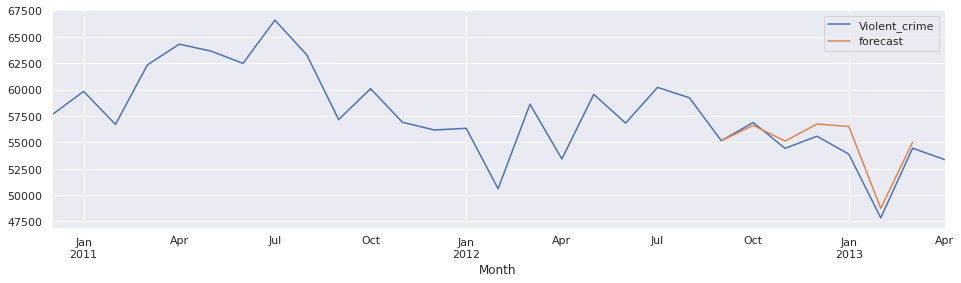

In [43]:
# To split the data into train and test data (splitting using start and end dates for test/forecast data)
index_pdf2['forecast'] = model_result.predict(start = '2012-09-01', end = '2013-03-01')
index_pdf2[['Violent_crime', 'forecast']].plot(figsize =(16,4))

The plot above shows model prediction. The forecasted data(orange color) very closely mirrors the original/raw data (blue color)

In [44]:
# To predict future violent crime rates, we create additional dataset for the next 2years(24months) using pandas library DateOffset

from pandas.tseries.offsets import DateOffset
TwoYears_forecast = [index_pdf2.index[-1] + DateOffset(months = x) for x in range(0, 24)]

In [45]:
TwoYears_forecast_df = pd.DataFrame(index = TwoYears_forecast[1:], columns = index_pdf2.columns)
TwoYears_forecast_df.tail()


,Violent_crime,first difference,seasonal difference,forecast
2014-11-01,NaN,NaN,NaN,NaN
2014-12-01,NaN,NaN,NaN,NaN
2015-01-01,NaN,NaN,NaN,NaN
2015-02-01,NaN,NaN,NaN,NaN
2015-03-01,NaN,NaN,NaN,NaN


In [46]:
# merging the original dataset with a two-year extrapolated dataset

extropolate_df = pd.concat([index_pdf2,TwoYears_forecast_df])


<AxesSubplot:>

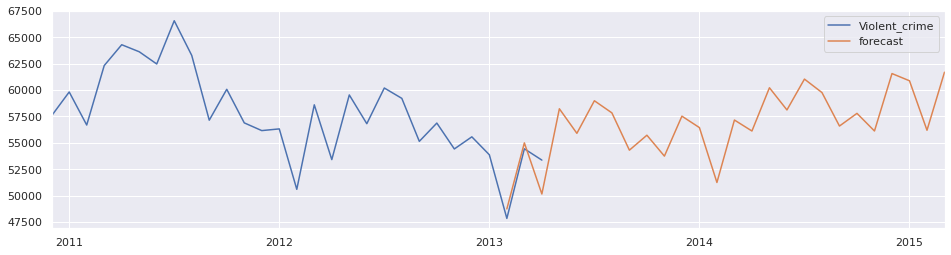

In [47]:
extropolate_df['forecast'] = model_result.predict(start = '2013-02-01', end = '2015-03-01')
extropolate_df[['Violent_crime', 'forecast']].plot(figsize =(16,4))

Plot above shows the model making prediction beyond the original data date, two years into the future.

#### Discussion and Conclusion
<p>The report seeks to examine the claim that violent crime is increasing in the United Kingdom, to determine the validity of this claim, crime data from different police forces across the United Kingdom was collected between December 2010 and April 2013 and reviewed using time series analysis. Visually, the time series and scatter plot indicate that during the period under review, violent crime decreased. However, a deeper statistical investigation was carried out, and the time series was decomposed into its components of trend, seasonality, and noise. These components were removed from the data to make it stationary and fit for modelling. To forecast violent criminal behaviour, a Seasonal ARIMA (SARIMA) model was developed and implemented, the model was trained using a range of data from the differenced stationary time series data. The test result showed a very close mirroring of the training data, an indication of a good model. To forecast the behaviour of violent crime in the future, the time data was extrapolated further by 2 years using the Python Timeseries DateOffset library, the data was merged with the original crime data. 
<p>With the merged data, the model predicted an increasing crime rate across the United Kingdom for the next 2years from the end date of the raw data. The SARIMA model was simple, and interpretable with a high level of accuracy and performance as indicated in the model summary and diagnostics, however, there is a limitation to the amount of data that can be employed for model training. During the analysis, it was realized that the model is unable to forecast using seasonal training data of less than 24 months, as there must be at least two seasonal cycles for training and additional data for test.


### Determine whether there are more firearms incidents per head in Birmingham than anywhere else in the UK

In [48]:
#Filter out the required crime type i.e firearm incidents
fire_arm = df.filter((df['Crime type'] == 'Possession of weapons') & (df['Outcome'] == 'Offender sent to prison')).select(["Month", "Location", "Crime type", "Reported by", "LSOA name", "Outcome"])

In [49]:
fire_arm.show()

+-------+--------------------+--------------------+--------------------+--------------------+--------------------+
|  Month|            Location|          Crime type|         Reported by|           LSOA name|             Outcome|
+-------+--------------------+--------------------+--------------------+--------------------+--------------------+
|2013-05|On or near Wellin...|Possession of wea...|Avon and Somerset...|        Bristol 004D|Offender sent to ...|
|2013-05|On or near Briar ...|Possession of wea...|Avon and Somerset...|        Bristol 018D|Offender sent to ...|
|2013-05|On or near Mina Road|Possession of wea...|Avon and Somerset...|        Bristol 023A|Offender sent to ...|
|2013-05|On or near Oxford...|Possession of wea...|Avon and Somerset...|        Bristol 055C|Offender sent to ...|
|2013-05|On or near Belton...|Possession of wea...|Avon and Somerset...|        Bristol 055C|Offender sent to ...|
|2013-05|On or near Waverl...|Possession of wea...|Avon and Somerset...|      Se

In [50]:
# Extract data by city where the crime was reported and count firearm incidents, Sort in decending order
df_max = fire_arm.groupBy("Reported by").count().orderBy("count", ascending=False)

In [51]:
#Show top 20 cities with maximum firearm incidences
df_max.show(truncate = False)

+------------------------------+-----+
|Reported by                   |count|
+------------------------------+-----+
|Metropolitan Police Service   |2095 |
|Greater Manchester Police     |589  |
|West Yorkshire Police         |583  |
|West Midlands Police          |427  |
|South Yorkshire Police        |406  |
|Devon & Cornwall Police       |362  |
|Kent Police                   |359  |
|Thames Valley Police          |348  |
|South Wales Police            |336  |
|Merseyside Police             |336  |
|Northumbria Police            |334  |
|Essex Police                  |274  |
|Nottinghamshire Police        |269  |
|Derbyshire Constabulary       |261  |
|Staffordshire Police          |255  |
|Humberside Police             |224  |
|West Mercia Police            |208  |
|Avon and Somerset Constabulary|202  |
|Durham Constabulary           |197  |
|Hertfordshire Constabulary    |184  |
+------------------------------+-----+
only showing top 20 rows



##### Result

<p>Using the All crime data, analysis reveals that the highest firearm incidences(2,095) was reported by the Metropolitan police in London, and  Greater Manchester police coming second, with firearm incidence count of 589 for the period under review.

### Using appropriate techniques, determine whether firearms incidents are associated with drugs offences.


In [58]:
# filtering out the relevant crime types
drug_offences = df.filter((df['Crime type'] == 'Drugs') & (df['Outcome'] == 'Offender sent to prison')).select(["Month", "Location", "Crime type", "Reported by", "LSOA name", "Outcome"])

In [59]:
# To display drug offences
drug_offences.show(10)

+-------+--------------------+----------+--------------------+-------------------+--------------------+
|  Month|            Location|Crime type|         Reported by|          LSOA name|             Outcome|
+-------+--------------------+----------+--------------------+-------------------+--------------------+
|2012-01|On or near Frankl...|     Drugs|Avon and Somerset...|       Bristol 023B|Offender sent to ...|
|2012-01|On or near Wellin...|     Drugs|Avon and Somerset...|       Bristol 023D|Offender sent to ...|
|2012-01|On or near Dalrym...|     Drugs|Avon and Somerset...|       Bristol 023H|Offender sent to ...|
|2012-01|On or near Silcox...|     Drugs|Avon and Somerset...|       Bristol 053B|Offender sent to ...|
|2012-01|On or near Westbo...|     Drugs|Avon and Somerset...|       Bristol 055B|Offender sent to ...|
|2012-01|On or near Poplar...|     Drugs|Avon and Somerset...|North Somerset 020B|Offender sent to ...|
|2012-01|On or near Poplar...|     Drugs|Avon and Somerset...|No

In [60]:
# Extract drug offences and firearm offences, rename columns and count for each offences type and group by month

drug_offences1 = drug_offences.select("Month")\
    .where((col('Crime type') ==  'Drugs'))\
    .groupBy("Month")\
    .count()\
    .orderBy("Month", ascending=True)

fire_arm1 = fire_arm.select("Month")\
    .where((col('Crime type') ==  'Possession of weapons'))\
    .groupBy("Month")\
    .count()\
    .orderBy("Month", ascending=True)

Monthly_drugOffences = drug_offences1.withColumnRenamed('count','Drug_Offenses')
Monthly_firearm = fire_arm1.withColumnRenamed('count','Firearm_Offenses')

Monthly_drugOffences.show(10)
Monthly_firearm.show(10)






+-------+-------------+
|  Month|Drug_Offenses|
+-------+-------------+
|2012-01|          570|
|2012-02|          559|
|2012-03|          780|
|2012-04|          501|
|2012-05|          668|
|2012-06|          512|
|2012-07|          591|
|2012-08|          544|
|2012-09|          488|
|2012-10|          484|
+-------+-------------+
only showing top 10 rows

+-------+----------------+
|  Month|Firearm_Offenses|
+-------+----------------+
|2013-05|             182|
|2013-06|             162|
|2013-07|             161|
|2013-08|             186|
|2013-09|             174|
|2013-10|             159|
|2013-11|             156|
|2013-12|             149|
|2014-01|             162|
|2014-02|             121|
+-------+----------------+
only showing top 10 rows



In [61]:
#Drop missing NaN values from the data to allow for further analysis

dfnull_firearm = Monthly_firearm.na.drop('any', subset = ['Month', 'Firearm_Offenses',])
dfnull_firearm.show(10, truncate = False)

dfnull_drugs = Monthly_drugOffences.na.drop('any', subset = ['Month', 'Drug_Offenses'])
dfnull_drugs.show(10, truncate = False)

+-------+----------------+
|Month  |Firearm_Offenses|
+-------+----------------+
|2013-05|182             |
|2013-06|162             |
|2013-07|161             |
|2013-08|186             |
|2013-09|174             |
|2013-10|159             |
|2013-11|156             |
|2013-12|149             |
|2014-01|162             |
|2014-02|121             |
+-------+----------------+
only showing top 10 rows

+-------+-------------+
|Month  |Drug_Offenses|
+-------+-------------+
|2012-01|570          |
|2012-02|559          |
|2012-03|780          |
|2012-04|501          |
|2012-05|668          |
|2012-06|512          |
|2012-07|591          |
|2012-08|544          |
|2012-09|488          |
|2012-10|484          |
+-------+-------------+
only showing top 10 rows



In [62]:
# Convert Pyspark dataframes to panda dataframes

pdfnull_drugs = dfnull_drugs.toPandas()

pdfnull_firearm = dfnull_firearm.toPandas()

In [63]:
pdfnull_drugs


,Month,Drug_Offenses
0,2012-01,570
1,2012-02,559
2,2012-03,780
3,2012-04,501
4,2012-05,668
...,...,...
81,2019-01,171
82,2019-02,120
83,2019-03,107
84,2019-04,96


In [64]:
pdfnull_firearm

,Month,Firearm_Offenses
0,2013-05,182
1,2013-06,162
2,2013-07,161
3,2013-08,186
4,2013-09,174
...,...,...
65,2019-01,136
66,2019-02,118
67,2019-03,110
68,2019-04,61


In [67]:
# to convert date type from string to datetime
pdfnull_drugs.Month = pdfnull_drugs.Month.astype('datetime64[ns]')
pdfnull_drugs2 = pdfnull_drugs.set_index(pd.to_datetime(pdfnull_drugs.Month))

In [68]:
## to convert date type from string to datetime
pdfnull_firearm.Month = pdfnull_firearm.Month.astype('datetime64[ns]')
pdfnull_firearm2 = pdfnull_firearm.set_index(pd.to_datetime(pdfnull_firearm.Month))

In [69]:
pdfnull_drugs2.index

DatetimeIndex(['2012-01-01', '2012-02-01', '2012-03-01', '2012-04-01',
               '2012-05-01', '2012-06-01', '2012-07-01', '2012-08-01',
               '2012-09-01', '2012-10-01', '2012-11-01', '2012-12-01',
               '2013-01-01', '2013-02-01', '2013-03-01', '2013-04-01',
               '2013-05-01', '2013-06-01', '2013-07-01', '2013-08-01',
               '2013-09-01', '2013-10-01', '2013-11-01', '2013-12-01',
               '2014-01-01', '2014-02-01', '2014-03-01', '2014-04-01',
               '2014-05-01', '2014-06-01', '2014-07-01', '2014-08-01',
               '2014-09-01', '2014-10-01', '2014-11-01', '2014-12-01',
               '2015-01-01', '2015-02-01', '2015-03-01', '2015-04-01',
               '2015-05-01', '2015-06-01', '2015-07-01', '2015-08-01',
               '2015-09-01', '2015-10-01', '2015-11-01', '2015-12-01',
               '2016-01-01', '2016-02-01', '2016-03-01', '2016-04-01',
               '2016-05-01', '2016-06-01', '2016-07-01', '2016-08-01',
      

In [70]:
pdfnull_firearm2.index

DatetimeIndex(['2013-05-01', '2013-06-01', '2013-07-01', '2013-08-01',
               '2013-09-01', '2013-10-01', '2013-11-01', '2013-12-01',
               '2014-01-01', '2014-02-01', '2014-03-01', '2014-04-01',
               '2014-05-01', '2014-06-01', '2014-07-01', '2014-08-01',
               '2014-09-01', '2014-10-01', '2014-11-01', '2014-12-01',
               '2015-01-01', '2015-02-01', '2015-03-01', '2015-04-01',
               '2015-05-01', '2015-06-01', '2015-07-01', '2015-08-01',
               '2015-09-01', '2015-10-01', '2015-11-01', '2015-12-01',
               '2016-01-01', '2016-02-01', '2016-03-01', '2016-04-01',
               '2016-05-01', '2016-06-01', '2016-07-01', '2016-08-01',
               '2016-09-01', '2016-10-01', '2016-11-01', '2016-12-01',
               '2017-01-01', '2017-02-01', '2017-03-01', '2017-04-01',
               '2017-05-01', '2017-06-01', '2017-07-01', '2017-08-01',
               '2017-09-01', '2017-10-01', '2017-11-01', '2017-12-01',
      

Text(0, 0.5, 'Drug Offenses')

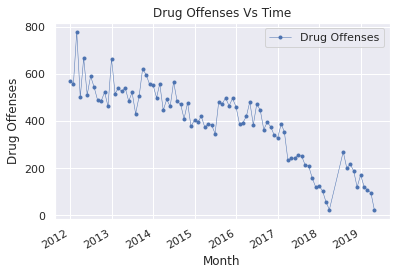

In [71]:
#To plot a drug offences timeseries graph for the period under review

plt.figsize=(10, 6)

pdfnull_drugs2.plot(y='Drug_Offenses', x='Month',marker='.', linestyle='-', linewidth=0.5,\
         subplots=False,
              label='Drug Offenses',
              title='Drug Offenses Vs Time')
plt.ylabel('Drug Offenses')

Text(0, 0.5, 'Firearm_Offenses')

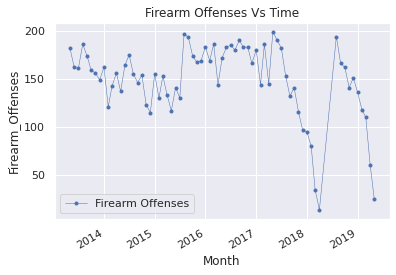

In [72]:
#To plot a firearm offences timeseries graph for the period under review

plt.figsize=(10, 6)
pdfnull_firearm2.plot(y='Firearm_Offenses', x='Month',marker='.', linestyle='-', linewidth=0.5,\
         subplots=False,
              label='Firearm Offenses',
              title='Firearm Offenses Vs Time')
plt.ylabel('Firearm_Offenses')

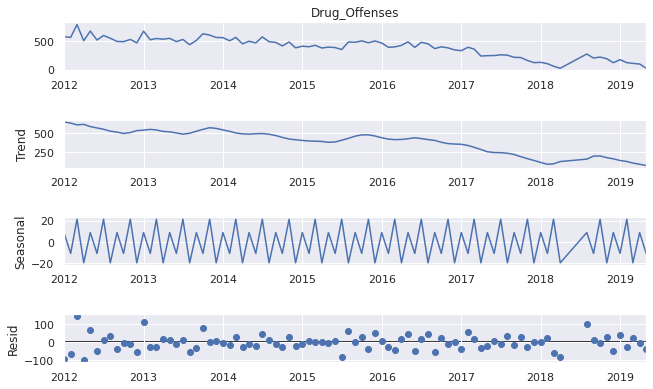

In [73]:
# Decomposing the time series
decomposition = sm.tsa.seasonal_decompose(pdfnull_drugs2['Drug_Offenses'], freq = 4, model='additive',extrapolate_trend='freq')
fig = decomposition.plot()
fig.set_size_inches(10,6)
plt.show()

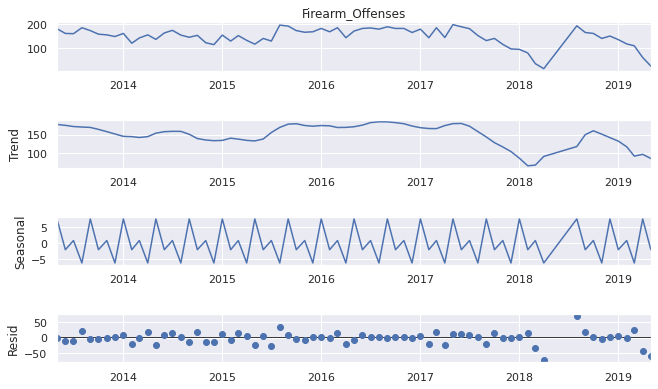

In [74]:
decomposition = sm.tsa.seasonal_decompose(pdfnull_firearm2['Firearm_Offenses'],freq = 4, model='additive',extrapolate_trend='freq')
fig = decomposition.plot()
fig.set_size_inches(10,6)
plt.show()

<P> To determine if the firearm incidents are associated with drug offences, we carry out a series of analyses and data visualization.
    
<P> Time series analysis of firearm incidents and drug offences was done, then decomposed to visualize the trend in the two data, both display similar trend for the period under review, indicating a close association

In [75]:
#to exract drug offences
df_outj = Monthly_firearm.join(Monthly_drugOffences, on = ["Month"], how = "Outer")
dfnull_drugs.show(10, truncate = False)

+-------+-------------+
|Month  |Drug_Offenses|
+-------+-------------+
|2012-01|570          |
|2012-02|559          |
|2012-03|780          |
|2012-04|501          |
|2012-05|668          |
|2012-06|512          |
|2012-07|591          |
|2012-08|544          |
|2012-09|488          |
|2012-10|484          |
+-------+-------------+
only showing top 10 rows



In [76]:
# to extract relevant data and drop NaN value
dfnull = df_outj.na.drop('any', subset = ['Month', 'Firearm_Offenses', 'Drug_Offenses'])
dfnull.show(10, truncate = False)


+-------+----------------+-------------+
|Month  |Firearm_Offenses|Drug_Offenses|
+-------+----------------+-------------+
|2013-05|182             |542          |
|2018-10|162             |217          |
|2013-09|174             |506          |
|2017-09|132             |212          |
|2013-12|149             |557          |
|2013-06|162             |485          |
|2017-10|141             |209          |
|2016-02|169             |386          |
|2017-05|199             |241          |
|2019-03|110             |107          |
+-------+----------------+-------------+
only showing top 10 rows



In [77]:
dfnull.schema

StructType(List(StructField(Month,StringType,true),StructField(Firearm_Offenses,LongType,true),StructField(Drug_Offenses,LongType,true)))

In [78]:
# convert to panda dataframe
pdfnull = dfnull.toPandas()

In [79]:
#convert date type to datetime
pdfnull.Month = pdfnull.Month.astype('datetime64[ns]')
pdfnull2 = pdfnull.set_index(pd.to_datetime(pdfnull.Month))

In [80]:
pdfnull2.index

DatetimeIndex(['2013-05-01', '2018-10-01', '2013-09-01', '2017-09-01',
               '2013-12-01', '2013-06-01', '2017-10-01', '2016-02-01',
               '2017-05-01', '2019-03-01', '2015-05-01', '2017-11-01',
               '2018-03-01', '2015-12-01', '2017-03-01', '2018-02-01',
               '2016-12-01', '2016-09-01', '2017-08-01', '2016-03-01',
               '2017-06-01', '2016-10-01', '2014-01-01', '2017-02-01',
               '2017-04-01', '2015-02-01', '2015-08-01', '2014-03-01',
               '2018-08-01', '2014-08-01', '2017-07-01', '2013-11-01',
               '2014-02-01', '2015-10-01', '2019-05-01', '2015-11-01',
               '2014-09-01', '2016-05-01', '2019-01-01', '2013-07-01',
               '2014-05-01', '2015-01-01', '2016-04-01', '2017-12-01',
               '2018-11-01', '2016-11-01', '2013-08-01', '2014-11-01',
               '2019-04-01', '2018-12-01', '2016-01-01', '2016-07-01',
               '2015-07-01', '2016-06-01', '2014-04-01', '2014-10-01',
      

In [81]:
# filter this time, by city reported
dfd_max = drug_offences.groupBy("Reported by").count().orderBy("count", ascending=False)
dfd_max.show(truncate = False)


+------------------------------+-----+
|Reported by                   |count|
+------------------------------+-----+
|Metropolitan Police Service   |5822 |
|West Yorkshire Police         |2088 |
|Greater Manchester Police     |2035 |
|South Wales Police            |1802 |
|Merseyside Police             |1792 |
|Kent Police                   |1358 |
|Devon & Cornwall Police       |1157 |
|South Yorkshire Police        |1072 |
|Avon and Somerset Constabulary|1004 |
|West Midlands Police          |997  |
|Derbyshire Constabulary       |965  |
|Thames Valley Police          |963  |
|Nottinghamshire Police        |841  |
|Hertfordshire Constabulary    |832  |
|Essex Police                  |814  |
|Lancashire Constabulary       |796  |
|Humberside Police             |735  |
|Staffordshire Police          |689  |
|West Mercia Police            |623  |
|Northumbria Police            |543  |
+------------------------------+-----+
only showing top 20 rows



In [82]:
# group by city reported and sort firearm and drug offences in descending order to investigate relationship
df_drug = dfd_max.withColumnRenamed('count','Drug_Offenses')
df_firearm = df_max.withColumnRenamed('count','Firearm_Offenses')
df_firearm.show(truncate = False)
df_drug.show(truncate = False)

+------------------------------+----------------+
|Reported by                   |Firearm_Offenses|
+------------------------------+----------------+
|Metropolitan Police Service   |2095            |
|Greater Manchester Police     |589             |
|West Yorkshire Police         |583             |
|West Midlands Police          |427             |
|South Yorkshire Police        |406             |
|Devon & Cornwall Police       |362             |
|Kent Police                   |359             |
|Thames Valley Police          |348             |
|Merseyside Police             |336             |
|South Wales Police            |336             |
|Northumbria Police            |334             |
|Essex Police                  |274             |
|Nottinghamshire Police        |269             |
|Derbyshire Constabulary       |261             |
|Staffordshire Police          |255             |
|Humberside Police             |224             |
|West Mercia Police            |208             |


In [83]:
#to join the two dataframes

df_out = df_firearm.join(df_drug, on = ["Reported by"], how = "Outer")
df_out.show(50, truncate = False)

+------------------------------+----------------+-------------+
|Reported by                   |Firearm_Offenses|Drug_Offenses|
+------------------------------+----------------+-------------+
|West Mercia Police            |208             |623          |
|Avon and Somerset Constabulary|202             |1004         |
|Merseyside Police             |336             |1792         |
|Bedfordshire Police           |160             |249          |
|City of London Police         |18              |168          |
|Cumbria Constabulary          |95              |415          |
|Durham Constabulary           |197             |532          |
|Devon & Cornwall Police       |362             |1157         |
|Lincolnshire Police           |106             |221          |
|Leicestershire Police         |124             |314          |
|Staffordshire Police          |255             |689          |
|Dorset Police                 |51              |248          |
|South Yorkshire Police        |406     

In [84]:
# to drop NaN value to allow for further analysis
dfout_null = df_out.na.drop('any', subset = ['Reported by', 'Firearm_Offenses', 'Drug_Offenses'])
dfout_null.show(50, truncate = False)

+------------------------------+----------------+-------------+
|Reported by                   |Firearm_Offenses|Drug_Offenses|
+------------------------------+----------------+-------------+
|West Mercia Police            |208             |623          |
|Avon and Somerset Constabulary|202             |1004         |
|Merseyside Police             |336             |1792         |
|Bedfordshire Police           |160             |249          |
|City of London Police         |18              |168          |
|Cumbria Constabulary          |95              |415          |
|Durham Constabulary           |197             |532          |
|Devon & Cornwall Police       |362             |1157         |
|Lincolnshire Police           |106             |221          |
|Leicestershire Police         |124             |314          |
|Staffordshire Police          |255             |689          |
|Dorset Police                 |51              |248          |
|South Yorkshire Police        |406     

In [86]:
# import correlation library
from pyspark.ml.stat import Correlation

In [87]:
dfout_null = df_out.na.drop('any', subset = ['Reported by', 'Firearm_Offenses', 'Drug_Offenses'])

In [88]:
#perform pearson correlation analysis
dfout_null.corr("Drug_Offenses","Firearm_Offenses", method = "pearson")

0.9671352096930805

#### Result and Conclusion

<P> Analyses reveal that Drug and Firearm offences display similar trend, month-to-month,for the period under review. 
<P> Analyses also reveal that cities that reported high firearm incidents also have high drug offenses reported, cities with top firearm incidents are thesame cities with top drugs offences.
<P> Lastly, a pearson correlation analysis was performed to statistically determine the level of relationship between the two variables.The correlation coffiecient of 0.96 was obtained, this is an indication of a strong positive relationship between firearm incidents and drug offences.

#### References
<p>[1]C. Chatfield, The Analysis of Time Series: An Introduction. Chapman & Hall/CRC., 2004.
<p>[2]Dr. Avishek Pal and Dr. PKS Prakash, Practical Time Series Analysis. Packt Publishing Ltd, 2017.
<p>[3]J. W. Graham, Missing Data : Analysis and Design. Dordrecht: Springer, 2012.
<p>[4]T. P. M. Lowe, L. Prescott-Mayling, S. Gilmour, and F. Allum, “Violent Crime and COVID-19 in England and Wales,” Covid-19, Society and Crime in Europe, no. 978–3031-135620, pp. 279–294, 2022, doi: 10.1007/978-3-031-13562-0_15.
<p>[5]P. J. Brockwell and R. A. Davis, Introduction to Time Series and Forecasting. Springer Verlag, 2013.
<p>[6]T. Raghunathan, Missing data analysis in practice. Boca Raton, FL: CRC Press, 2015.
<p>[7]S. Walby, J. Towers, and B. Francis, “Is Violent Crime Increasing or Decreasing? a New Methodology to Measure Repeat Attacks Making Visible the Significance of Gender and Domestic Relations,” British Journal of Criminology, vol. 56, no. 6, pp. 1203–1234, Dec. 2015, doi: 10.1093/bjc/azv131.
<p>[8]Leonie, “Time Series: Interpreting ACF and PACF,” kaggle.com. https://www.kaggle.com/code/iamleonie/time-series-interpreting-acf-and-pacf
<p>[9]T. A. Team and T. A. Team, “Time Series Forecasting with ARIMA Models In Python [Part 2] – Towards AI,” Towards AI. https://towardsai.net/p/l/time-series-forecasting-with-arima-models-in-python-part-2 (accessed Dec. 22, 2022).
<p>[10]X. Zhang, Y. Liu, M. Yang, T. Zhang, A. A. Young, and X. Li, “Comparative Study of Four Time Series Methods in Forecasting Typhoid Fever Incidence in China,” PLoS ONE, vol. 8, no. 5, p. e63116, May 2013, doi: 10.1371/journal.pone.0063116.<p>[11]T. Fang and R. Lahdelma, “Evaluation of a multiple linear regression model and SARIMA model in forecasting heat demand for district heating system,” Applied Energy, vol. 179, pp. 544–552, Oct. 2016, doi: 10.1016/j.apenergy.2016.06.133.
<p>[12]M. P. Makananisa and J. L. Erero, “Predicting South African personal income tax– using Holt–Winters and SARIMA,” Journal of Economics and Management, vol. 31, pp. 24–49, 2018, doi: 10.22367/jem.2018.31.02.
<p>[13]R. Li, Essential Statistics for Non-STEM Data Analysts Get to Grips with the Statistics and Math Knowledge Needed to Enter the World of Data Science with Python. Birmingham: Packt Publishing, Limited, 2020.
<p>[14]R. Gould, “Statistics and the Modern Student,” International Statistical Review, vol. 78, no. 2, pp. 297–315, Jun. 2010, doi: 10.1111/j.1751-5823.2010.00117.x.
<p>[15]E. B. Dagum, “Time series modeling and decomposition,” Statistica, vol. 70, no. 4, pp. 433–457, Dec. 2010, doi: 10.6092/issn.1973-2201/3597.
<p>[16]T. Stadnytska, “Deterministic or Stochastic Trend,” Methodology, vol. 6, no. 2, pp. 83–92, Jan. 2010, doi: 10.1027/1614-2241/a000009.